In [4]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import os

In [1]:
def import_dataset(split_percent = 70):
    # dataset = pd.read_csv('E:\ELL_Project\problem2\weather_data.csv')     
    pwd = os.getcwd()+'\\weather_data.xlsx'
    dataset = pd.read_excel(pwd)                     
    dataset = dataset.sample(frac = 1)
    X = dataset.iloc[:,:-1].values
    y = dataset.iloc[:,-1:].values
    datasize = X.shape[0]

    split_point = split_percent//10

    X_train = X[:(datasize*split_point)//10,:]
    y_train = y[:(datasize*split_point)//10,:]
    X_test = X[(datasize*split_point)//10:,:]
    y_test = y[(datasize*split_point)//10:,:]

    return(X_train,X_test,y_train,y_test)


In [4]:
def feature_scaling(X_train):
    training_size = X_train.shape[0]
    X_mean = np.sum(X_train,axis=0) / training_size
    X_var = np.sqrt(np.sum((np.square(X_train-X_mean)),axis=0)/training_size)
    X_train_reg = (X_train - X_mean) / X_var

    return (X_mean,X_var,X_train_reg)


In [5]:
def KNN(X_train,y_train,X_test,y_test,k_num,feat_scal=True):

    test_size = X_test.shape[0]
    train_size = X_train.shape[0]
    # X_m,X_v,X_r,y_m,y_v,y_r = feature_scaling(X_train,y_train)
    if feat_scal:
        X_m,X_v,X_r = feature_scaling(X_train)
        X_test_reg = (X_test-X_m)/X_v
    else:
        X_r = X_train
        X_test_reg = X_test
    # y_test_reg = (y_test-y_m)/y_v
    y_pred = np.array([])
    # print(y_pred)
    for i in range(test_size):
        sample_X = X_test_reg[i:i+1,:]
        sample_y = y_test[i,:]
        dist_vec = np.sqrt(np.sum(np.square(X_r-sample_X),axis=1))
        dist_vec = dist_vec.reshape((train_size,1))

        d = np.column_stack((dist_vec[:,:],y_train[:,0]))
        # print(d)

        sorted_dist = d[np.argsort(d[:, 0])]
        temp_distance_vector = sorted_dist[:k_num,0]
        distance_vector = temp_distance_vector.reshape(-1,1)
        # distance_vector = np.append(np.ones(distance_vector.shape),distance_vector)
        # print(distance_vector.shape)
        for j in np.arange(0,10,0.5):
            distance_vector = np.append(distance_vector,(temp_distance_vector**j).reshape(-1,1),axis=1)
        distance_vector = distance_vector[:,1:]
        # print(distance_vector.shape)
        ddd = np.sum(distance_vector,axis=0).reshape(1,-1)
        # print(ddd[0,0])
        # print(ddd.shape)

        y_val_vector = sorted_dist[:k_num,1].reshape(-1,1)
        # print(y_val_vector.shape)
        # print(distance_vector.shape)
        # print(ddd.shape)
        num1 = np.dot(np.transpose(y_val_vector),distance_vector) / ddd
        # print(num1.shape)
        # num1 = np.max(num1)
        if i==0:
            # print('check')
            y_pred = num1.reshape(1,-1)
        else:
            # print(y_pred.shape)
            y_pred = np.append(y_pred,num1.reshape(1,-1),axis=0)
            

    # print(y_pred.shape)
    return y_pred
    
        



In [21]:
def accuracy(y_pred,y_test):

    # y_pred = y_pred.reshape(-1,1)
    print('MSE LOSS')
    mse_loss = np.sum(np.square((y_test-y_pred)),axis=0) / y_test.shape[0]
    print(mse_loss)
    print('............................................................................')
    print('MAE LOSS')
    mae_loss = np.sum(np.abs((y_test-y_pred)),axis=0) / y_test.shape[0]
    print(mae_loss)
    # print('............................................................................')
    return mse_loss,mae_loss

In [23]:
X_train,X_test,y_train,y_test = import_dataset()
y_pred = KNN(X_train,y_train,X_test,y_test,50,False)
mse,_ = accuracy(y_pred,y_test)

MSE LOSS
3.9146360000000002
............................................................................
MAE LOSS
1.119133333333333


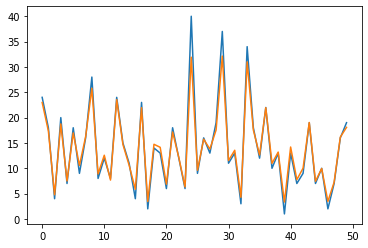

In [15]:
x = np.arange(y_test.shape[0])
plt.plot(x[:50],y_test[:50])
plt.plot(x[:50],y_pred[:50,0])

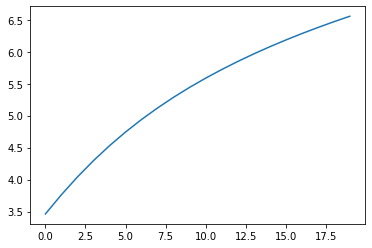

In [20]:
xd = np.arange(mse.shape[0])
plt.plot(xd,mse)